## Setup Environment
### import libraries & dataset

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv('titanic.csv')

## Exploratory Data Analysis

<img src="crips_dm.png">

### Recipe:
#### Univariate:
- Cek dimensi data (tabel-tabel)
- Cek tipe data dari masing-masing kolom
- Tampilkan sebagian value dari masing-masing kolom
- Lakukan perhitungan descriptive statistics untuk tiap kolom
- Lakukan analisis visual dengan memplot tiap variable
- Cek missing value
- Cek duplikasi
- Cek validitas (format / range / limit / reference / dll)

....

- cek duplikat

#### Multivariate:
- bivariate analysis
    - Two Categorical
    - Categorical and Numerical
    - Two Numerical
- multivariate
    - Dimensionality Reduction

#### Cek Data

In [ ]:
data.head()


#### Hasil Univariate Analisis

- target variable adalah 'Survived'. 38.4% survived
- tipe variable
    - Categorical: Sex, Embarked
    - Ordinal: PClass
    - Continuous: Age, Fare
    - Discrete: SibSp, Parch
- the middle part of each name is a title of the person, other than that, we can drop the Name column
- Age has some missing value that need to be inputed
- Cabin has too many missing value, we can drop it
- Ticket has too many unique value with difference formats, so we can drop it as well
- Passenger Id holds the unique ID of each person, not much information given for predictiong survivability

In [ ]:
data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
data.drop(columns=['Name','Ticket','Cabin','PassengerId'], inplace=True)
data.head()

You are now capable of analyzing all of the variables sequentially, one after the other. Bravo, you are an expert at univariate analysis!

Sorry: it’s not over. In this Part, we are going to analyze the relationships between variables. This is known as bivariate analysis.

### Bivariate Analysis
*Correlation*
Concept of relationship between variables is known more formally as correlation. When we say that two variables are correlated, we mean that if we know the value of one, then it is possible to have a (more or less accurate) indication of the value of the other.

Correlations are useful because they can indicate a predictive relationship that can be exploited in practice. So, the most important correlation that we must find out is the correlation between independent and dependent variable 


#### Categorical to Categorical

To check correlation between two categorical variables, we can try making a Contingency Table (cross tabulation/crosstab). Additionally, to visualize the crosstab result, we can plot it using bar chart or factor plot

If we want to test dependency of two categorical variable with a statistical approach, we can use chi-square test. test used to analyze how significant a relationship between two categorical variables is. However, on this occasion, we will not test the significancy of the correlation but only intuitively look at dependency based on visualization 

We start with <br>
**Sex and Survived**

In [ ]:
pd.crosstab(data['Sex'], data['Survived'])

In [ ]:
pd.crosstab(data['Sex'], data['Survived']).apply(lambda r: r/r.sum(), axis=1).style.background_gradient(cmap='summer_r')

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,5))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for **a women on the ship is around 75% while that for men in around 18-19%**.

This looks to be a **very important** feature for modeling. But is it the best?? Lets check other features.

**Pclass and Survived**

In [ ]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,5))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything**. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 %survived is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.

In [ ]:
pd.crosstab([data.Sex,data.Pclass],data.Survived,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

We use **FactorPlot** in this case, because they make the seperation of categorical values easy.

Looking at the **CrossTab** and the **FactorPlot**, we can easily infer that survival for **Women from Pclass1** is about **95-96%**, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.

**Embarked and Survived**

In [ ]:
pd.crosstab(data['Embarked'], data['Survived']).apply(lambda r: r/r.sum(), axis=1).style.background_gradient(cmap='summer_r')

In [ ]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

Let's combine other categorical feature to this Embarked variable

In [ ]:
pd.crosstab([data.Embarked,data.Pclass],data.Survived,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[0])
ax[0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1])
ax[1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Observations:
1. Maximum passengers boarded from S. Majority of them being from Pclass3.

2. The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3. The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

4. Port Q had almost 95% of the passengers were from Pclass3.

**Initial vs Survived**

In [ ]:
pd.crosstab(data.Initial,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
sns.factorplot('Initial','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The result shows a similar result, initials for women have higher survival rate. But we got a new finding, it shows that initial for child (master) has somewhat high survival rate 

#### Numberic to Categorical

As explained before, we can do chi-squared test to check a correlation significancy between two categorical variable. However, if we want to test correlation between a qualitative/categorical variable and a quantitative/numerical, we can do a ANNOVA test.

Additionaly, on this occation, we will only observe the correlation based on visual analysis. To do so, we can make a grouped boxplot/histogram/distplot as well as a violin plot to show a different quantitative distribution among each category.

**Age and Initial**

In [ ]:
sns.boxplot(x='Initial', y='Age', data=data)

We can see from the boxplots that Master is an initial for child and miss is an initial for a younger person (probably women)

In [ ]:
sns.countplot('Initial',hue='Sex',data=data)

We can use this correlation info to input the missing values in Age column. We will use a mean value of age from each initial group.

In [ ]:
map_dict = data.groupby('Initial')['Age'].mean().round().to_dict()
map_dict

In [ ]:
for initial in map_dict.keys():
    data.loc[(data.Age.isnull())&(data.Initial==initial),'Age']=map_dict[initial]

data.Age.isnull().any()

**Age and Survived**

In [ ]:
sns.boxplot(x='Survived', y='Age', data=data)

In [ ]:
target_0 = data.loc[data['Survived'] == 0]
target_1 = data.loc[data['Survived'] == 1]

sns.distplot(target_0[['Age']], hist=False, rug=True)
sns.distplot(target_1[['Age']], hist=False, rug=True)


We can't conclude any correlation between age and survived from the boxplot

We can see from the distplot that a kid until 10 years old, has higher survival rate that others who older that them. It is shown as the red distribution line is higher on that age range. We can make a new feature to flag person as a child <= 10 years old.

**Fare and Survived**

In [ ]:
sns.boxplot(x='Survived', y='Fare', data=data)

In [ ]:
target_0 = data.loc[(data['Survived'] == 0) & (data['Pclass'] == 1)]
target_1 = data.loc[(data['Survived'] == 0) & (data['Pclass'] == 2)]
target_2 = data.loc[(data['Survived'] == 0) & (data['Pclass'] == 3)]
target_3 = data.loc[(data['Survived'] == 1) & (data['Pclass'] == 1)]
target_4 = data.loc[(data['Survived'] == 1) & (data['Pclass'] == 2)]
target_5 = data.loc[(data['Survived'] == 1) & (data['Pclass'] == 3)]


f,ax=plt.subplots(1,3,figsize=(20,5),sharey=True)
sns.distplot(target_0[['Fare']], hist=False, rug=True, ax=ax[0])
# ax[0,0].set_title('Pclass 1 Not Survive')
sns.distplot(target_1[['Fare']], hist=False, rug=True, ax=ax[1])
# ax[0,1].set_title('Pclass 2 Not Survive')
sns.distplot(target_2[['Fare']], hist=False, rug=True, ax=ax[2])
# ax[0,2].set_title('Pclass 2 Not Survive')
sns.distplot(target_3[['Fare']], hist=False, rug=True, ax=ax[0])
# ax[1,0].set_title('Pclass 1 Survive')
sns.distplot(target_4[['Fare']], hist=False, rug=True, ax=ax[1])
# ax[1,1].set_title('Pclass 2 Survive')
sns.distplot(target_5[['Fare']], hist=False, rug=True, ax=ax[2])
# ax[1,2].set_title('Pclass 3 Survive')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Higher the fare, higher the survived rate, as can be seen on higher density of red line when the fare becomes higher. As our knowledge before, PClass 1 is the most expensive class and PClass 3 is the lowest class ticket

#### SibSp and Survived
This feature represents whether a person is alone or with his family members.
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife

even though this variable is a discrete numeric variable, we can do the same visual analysis with factor plot since this varible has small range of value

In [ ]:
sns.factorplot('SibSp','Survived', data=data)

The factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass??

In [ ]:
pd.crosstab([data.Pclass,data.Survived],data.SibSp).style.background_gradient(cmap='summer_r')

The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

#### Parch and Survived

In [ ]:
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
plt.show()

Here too the results are quite similar. Passengers with their parents/childs onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents/childs on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents/childs on the ship.

#### Parch + SibSp

In [ ]:
data['SibPar'] = data['SibSp'] + data['Parch']
sns.factorplot('SibPar','Survived',data=data,ax=ax[1])
plt.show()

#### Two Numerical

Contingency tables are useful when both variables are qualitative, whereas if we want to show correlation between Scatter two quantitative varible, scatter plot is proven to be effective.

Graphs are nice, but if we need a numerical indicator that can tell us whether our variables are correlated, we need a statistical approach to do so. As the other pairs of variable type, we can use the Pearson’s correlation coefficient to shows us how high the correlation between the two variables.

Strong correlation?

![](http://www.uow.edu.au/content/groups/public/@web/@stsv/documents/mm/uow153493.gif)

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Interpreting The Heatmap
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

**POSITIVE CORRELATION**: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

**NEGATIVE CORRELATION**: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

### Observations in a Nutshell for all features:
**Sex**: The chance of survival for women is high as compared to men.

**Pclass**:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

**Age**: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked**: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

**Parch+SibSp**: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

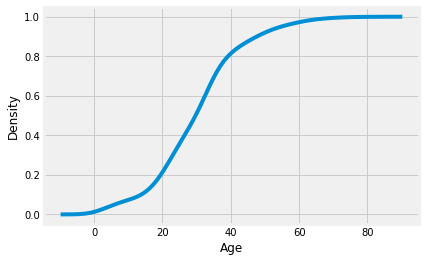

In [43]:
sns.kdeplot(data.Age, cumulative=True)

### Multivariate Analysis

we are going to go one step further and study the relationship between 3 or more variables at the same time. This is called multivariate exploratory analysis.

On a paper or on a screen, it is easy to make a graph with 2 dimensions. It would have 2 axes: one horizontal and one vertical, as shown in the scatterplot above.

In 3 dimensions, depth is added. Here, we can still manage to visualize our data - just imagine a room full of ping pong balls. But what happens when we move to 4 dimensions? It comes very hard for the human brain to imagine. Fortunately, in statistics, we have techniques that work with a large number of dimensions. These techniques can also be used to reduce the number of dimensions to something that works better on a human scale. In this course, we are going to be looking at these techniques.

- Dimensionality reduction Technique - Principal Component Analysis (PCA)<br>
PCA lets you reduce the number of variables by finding new variables that combine the essence of several others. Finding such variables allows us to replace several  columns  in a table with just a few. In so doing, we will lose a little information, but we can make an informed choice by weighing up the benefit of simplifying the data against the downside of the lost information.

In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')
data['Sex'] = data.Sex.map({'male':0,'female':1})

from sklearn.preprocessing import OneHotEncoder
embEncoder = OneHotEncoder()

transformed = embEncoder.fit_transform(data.Embarked.to_numpy().reshape(-1,1))
ohe_df = pd.DataFrame(transformed.toarray(), columns=embEncoder.get_feature_names()).iloc[:,:-1]
data = pd.concat([data, ohe_df], axis=1).drop(['Embarked'], axis=1)
data.head()

In [ ]:
intEncoder = OneHotEncoder()
transformed = intEncoder.fit_transform(data.Initial.to_numpy().reshape(-1,1))
ohe_df = pd.DataFrame(transformed.toarray(), columns=intEncoder.get_feature_names()).iloc[:,:-1]
data = pd.concat([data, ohe_df], axis=1).drop(['Initial'], axis=1)
data.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minMax = MinMaxScaler()
data['Age'] = minMax.fit_transform(data.Age.to_numpy().reshape(-1,1))
data['Fare'] = minMax.fit_transform(data.Fare.to_numpy().reshape(-1,1))
data.head()

In [ ]:
from sklearn.decomposition import PCA

try_pca = PCA().fit(data.iloc[:,1:])
plt.plot(np.cumsum(try_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
pca_obj = PCA(n_components=2)
hasil = pca_obj.fit_transform(data.iloc[:,1:])
hasil_pca = pd.concat([pd.DataFrame(hasil,columns=['Pca1','Pca2']),data['Survived']], axis = 1)
hasil_pca.head()

In [ ]:
plt.scatter(hasil_pca['Pca1'], hasil_pca['Pca2'],
            c=hasil_pca['Survived'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('inferno', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
pca_obj = PCA(n_components=3)
hasil = pca_obj.fit_transform(data.iloc[:,1:])
hasil_pca = pd.concat([pd.DataFrame(hasil,columns=['Pca1','Pca2','Pca3']),data['Survived']], axis = 1)
hasil_pca.head()

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure(figsize=(10,6))
ax = Axes3D(fig)

ax.scatter(hasil_pca['Pca1'], hasil_pca['Pca2'], hasil_pca['Pca3'],c=hasil_pca['Survived'])
pyplot.show()

In [ ]:
data.Age